In [10]:
import numpy as np
import matplotlib.pyplot as plt
from utils import gnc_utils



[[ 0.9330127   0.25        0.25881905]
 [-0.25881905  0.96592583  0.        ]
 [-0.25       -0.0669873   0.96592583]]
[[ 0.8365163   0.48296291  0.25881905]
 [-0.5         0.8660254   0.        ]
 [-0.22414387 -0.12940952  0.96592583]]
[[ 0.6830127   0.6830127   0.25881905]
 [-0.70710678  0.70710678  0.        ]
 [-0.1830127  -0.1830127   0.96592583]]


/tmp/ipykernel_1134/3880786648.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


Text(0.5, 0, 'Z axis')

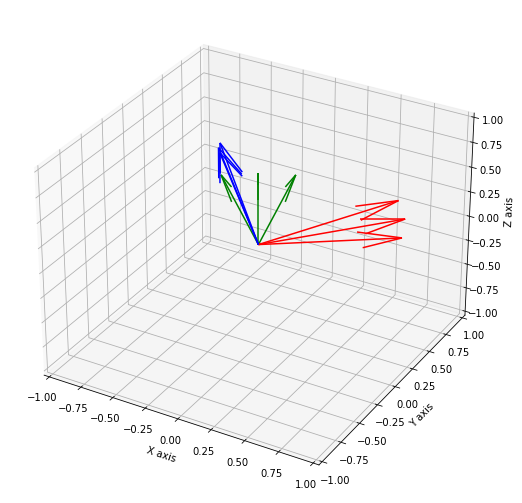

In [30]:

fig = plt.figure(figsize=(19,9))
ax = fig.gca(projection='3d')

DEG_2_RAD = np.pi/180

DCM = gnc_utils.C3(15 * DEG_2_RAD)
DCM = np.matmul(gnc_utils.C2(-15 * DEG_2_RAD), DCM)

for angle in [0, 15, 30]:
    triad = np.eye(3)
    triad = np.matmul(gnc_utils.C3(angle * DEG_2_RAD), triad)
    triad = np.matmul(DCM, triad)

    ax.quiver(0,0,0, *triad[0,:], color='red') # X
    ax.quiver(0,0,0, *triad[1,:], color='green') # Y
    ax.quiver(0,0,0, *triad[2,:], color='blue') # Z. Coloring scheme follows SOLIDWORKS
ax.set_xlim3d((-1,1))
ax.set_ylim3d((-1,1))
ax.set_zlim3d((-1,1))
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_zlabel("Z axis")